In [1]:
%matplotlib inline

import sqlite3, matplotlib
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

z = 200
iterations = 500
polo_path = '/Users/rca2t/Documents/Projects/TopicModels/polo_test'
project = 'battelle'
trial = 'trial_200'

dbfile = polo_path + '/projects/{0}/trials/{1}/{0}-{1}-z{2}-i{3}.db'.format(project,trial,z,iterations)

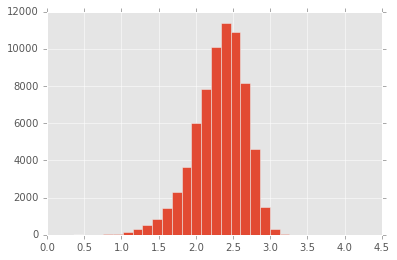

  Mean entropy    2.32
  Median entropy  2.36
  Max entropy     4.31
  Min entropy     0.36


In [2]:
with sqlite3.connect(dbfile) as conn:
    # Plot the topic entropy for the topic model
    df = pd.read_sql_query("SELECT round(topic_entropy,2) as 'h' FROM doctopic ORDER BY topic_entropy",conn)
    _ = plt.hist(df['h'],bins=30)
    plt.show()
    
    mean_entropy   = df['h'].mean()
    median_entropy = df['h'].median()
    max_entropy    = df['h'].max()
    min_entropy    = df['h'].min()
    print('  Mean entropy   ',round(mean_entropy,2))
    print('  Median entropy ',median_entropy)
    print('  Max entropy    ',max_entropy)
    print('  Min entropy    ',min_entropy)

In [3]:
with sqlite3.connect(dbfile) as conn:
    
    # Get docs with higj entropy
    max_h = 3.5 # Something a little less than what we found
    df1 = pd.read_sql_query("SELECT d.doc_id,LENGTH(d.doc_content) as 'doc_len',dt.topic_entropy FROM doctopic dt JOIN doc d USING (doc_id) WHERE dt.topic_entropy >= {0} ORDER BY dt.topic_entropy DESC".format(max_h),conn)
    print('-' * 80)
    print('Docs with H >=', max_h)
    print(df1)
    
    # Get docs with low entropy
    min_h = 1 # Something a little less than what we found
    df2 = pd.read_sql_query("SELECT d.doc_id,LENGTH(d.doc_content) as 'doc_len',dt.topic_entropy FROM doctopic dt JOIN doc d USING (doc_id) WHERE dt.topic_entropy <= {0} ORDER BY dt.topic_entropy".format(min_h),conn)
    print()
    print('-' * 80)
    print('Docs with H <=', min_h)
    print(df2)

--------------------------------------------------------------------------------
Docs with H >= 3.5
     doc_id  doc_len  topic_entropy
0  doc59853        5       4.308674
1  doc59514        4       4.305525
2  doc34158       11       4.304587
3  doc34159       11       4.301537
4  doc61696        2       4.298150
5  doc63125        1       4.295687
6  doc52607       10       4.294080
7  doc55719       52       4.292050
8  doc14290       72       3.524700
9  doc45202      110       3.512297

--------------------------------------------------------------------------------
Docs with H <= 1
       doc_id  doc_len  topic_entropy
0    doc21050     1369       0.362810
1    doc22088     1051       0.514231
2    doc21901     1221       0.525142
3    doc20612     1670       0.589536
4    doc44060     1878       0.598778
5    doc11601     1274       0.623198
6     doc4477     1146       0.642546
7    doc20491     1883       0.660943
8    doc68160      831       0.662158
9    doc14129     1016   